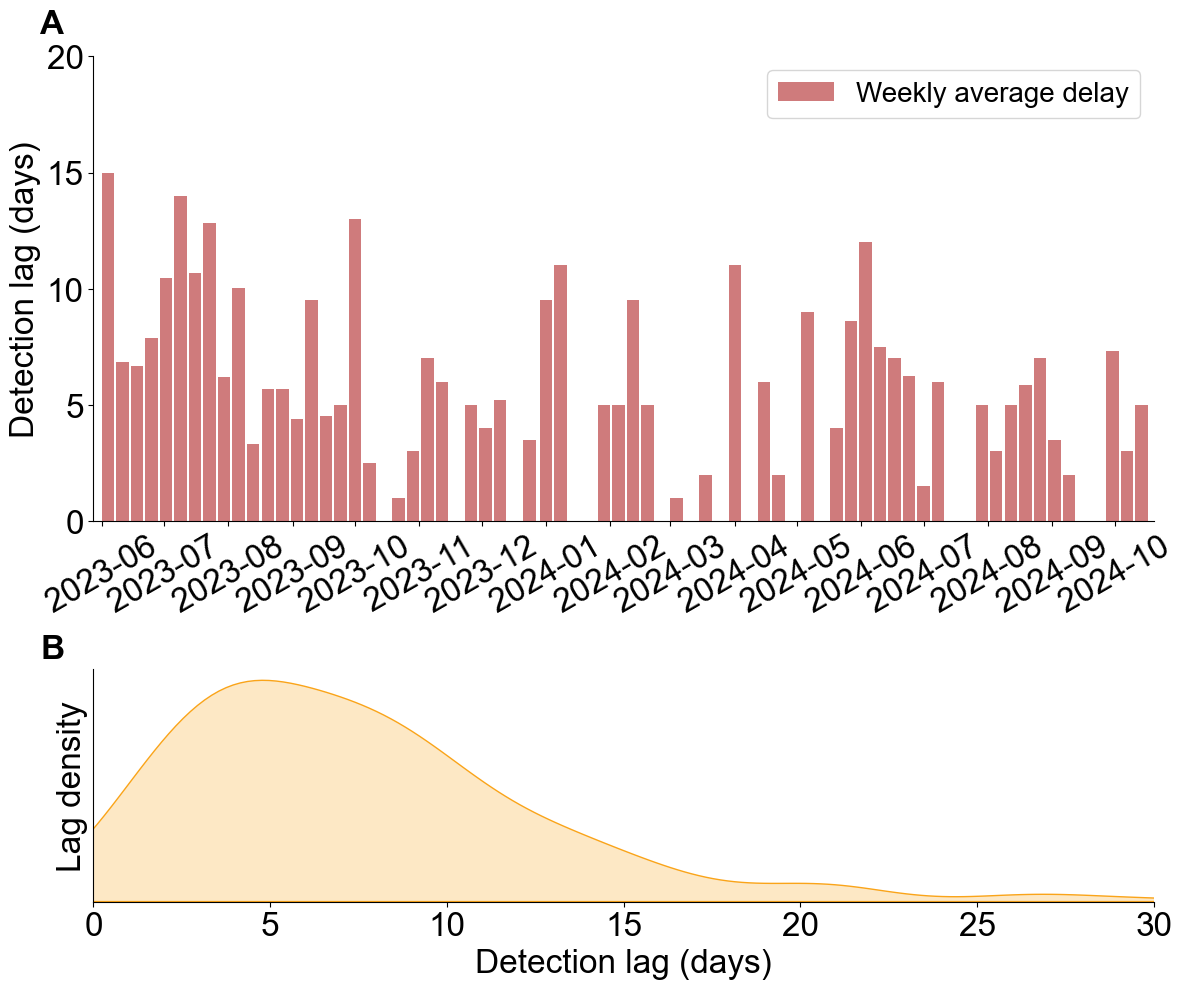

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

plt.rcParams['font.family'] = 'Arial'

df = pd.read_csv('data/metadata_time.csv')

df['diagnosis_date'] = pd.to_datetime(df['诊断时间'])
df['onset_date'] = pd.to_datetime(df['发病日期'])

df['delay'] = (df['diagnosis_date'] - df['onset_date']).dt.days
df = df[df['delay'] <= 30]

df['week'] = df['diagnosis_date'].dt.isocalendar().week
df['year'] = df['diagnosis_date'].dt.year

weekly_delay = df.groupby(['year', 'week'])['delay'].agg(['mean', 'count']).reset_index()

weekly_delay['date'] = weekly_delay.apply(
    lambda x: pd.Timestamp(year=int(x['year']), month=1, day=1) + 
    pd.Timedelta(weeks=int(x['week'])-1), axis=1
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

ax1.text(-0.05, 1.05, 'A', transform=ax1.transAxes, fontsize=24, fontweight='bold')
ax2.text(-0.05, 1.05, 'B', transform=ax2.transAxes, fontsize=24, fontweight='bold')

delay_color = '#b02425'
density_color = '#faa419'

ax1.bar(weekly_delay['date'], weekly_delay['mean'],
        color=delay_color, alpha=0.6, label='Weekly average delay',
        width=6)

ax1.set_ylim(0, 20)
ax1.yaxis.set_major_locator(plt.MultipleLocator(5))

ax1.set_xlabel('')
ax1.set_ylabel('Detection lag (days)', fontsize=24)
ax1.legend(loc='upper right', fontsize=20)
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=24)

start_date = pd.Timestamp('2023-05-28')
end_date = pd.Timestamp('2024-10-20')
ax1.set_xlim(start_date, end_date)

ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
ax1.tick_params(axis='x', rotation=30)

sns.kdeplot(data=df['delay'], ax=ax2, color=density_color, fill=True)
ax2.set_xlabel('Detection lag (days)', fontsize=24)
ax2.set_ylabel('Lag density', fontsize=24)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', labelsize=24)
ax2.set_xlim(0, 30)
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('fig_4.svg', format='svg', bbox_inches='tight')
plt.savefig('fig_4.pdf', bbox_inches='tight')
plt.savefig('fig_4.png', bbox_inches='tight')

plt.show()
